In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MyData/databt/data_o.csv")
artist_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_artist_o.csv')
genre_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_genres_o.csv')
year_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_year_o.csv')

In [ ]:
genre_data=genre_data.drop(401, axis=0)
data=data.drop([107341, 138618, 168377], axis=0)

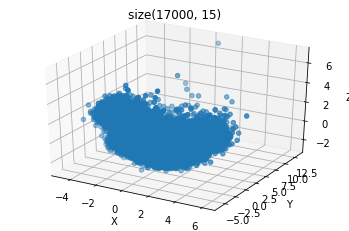

In [ ]:
data_=data.sample(n=17000, random_state=1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pl_data3d= Pipeline([('scaler', StandardScaler()), ('3dim', PCA(n_components=3))])
X = data_.select_dtypes(np.number)
pl_data3d.fit(X)
X3d=pl_data3d.transform(X)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("size"+str(X.shape))
plt.show()
# print(X.size)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X_ = data_.select_dtypes(np.number)
modelscaler=StandardScaler()
modelscaler.fit(X_)
X=modelscaler.transform(X_)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

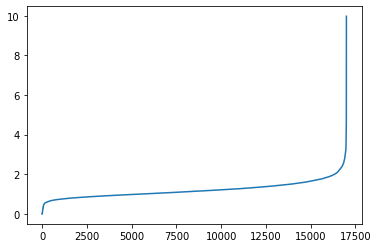

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
# eps=distances.mean()
plt.savefig("epsDBSCAN.png")

In [ ]:
X = data_.select_dtypes(np.number)
pl_dbscan= Pipeline([('scaler', StandardScaler()), ('dbscan', DBSCAN(eps=3, min_samples=9))])
pl_dbscan.fit(X)
model=pl_dbscan['dbscan']
clusters=model.labels_

In [ ]:
label=np.unique(clusters)
print(data_.iloc[clusters==-1,:].shape)

(101, 19)


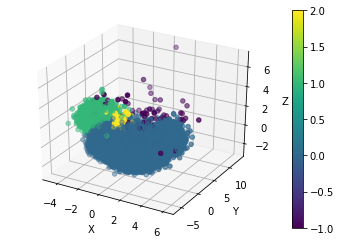

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pl_data3d= Pipeline([('scaler', StandardScaler()), ('3dim', PCA(n_components=3))])
X = data_.select_dtypes(np.number)
pl_data3d.fit(X)
X3d=pl_data3d.transform(X)
ax = plt.axes(projection='3d')
p=ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=clusters)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(p,ax=ax)
plt.savefig("dataDBSCAN.png")

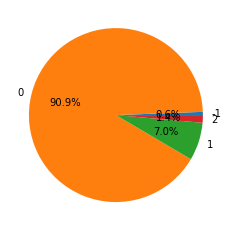

In [ ]:
X=[data_.iloc[clusters==i,:] for i in label]
pie=[i.shape[0] for i in X]
plt.pie(pie,labels=label , autopct='%1.1f%%')
plt.savefig("pieDBSCAN.png")

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pl_data3d= Pipeline([('scaler', StandardScaler()), ('optics', OPTICS(min_samples=9))])
X = data_.select_dtypes(np.number)
pl_data3d.fit(X)
model=pl_data3d['optics']
clusters=model.labels_

In [ ]:
label=np.unique(clusters)

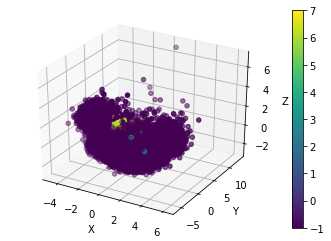

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pl_data3d= Pipeline([('scaler', StandardScaler()), ('3dim', PCA(n_components=3))])
X = data_.select_dtypes(np.number)
pl_data3d.fit(X)
X3d=pl_data3d.transform(X)
ax = plt.axes(projection='3d')
p=ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=clusters)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(p,ax=ax)
plt.savefig("dataOPTICS.png")

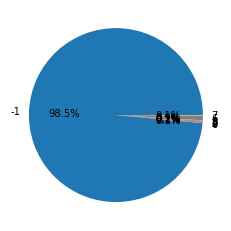

In [ ]:
X=[data_.iloc[clusters==i,:] for i in label]
pie=[i.shape[0] for i in X]
plt.pie(pie,labels=label, autopct='%1.1f%%')
plt.savefig("pieOPTICS.png")

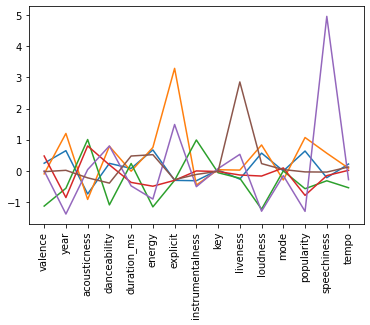

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k=6
X = data.select_dtypes(np.number)
models=Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=k, n_jobs=4))])
models.fit(X)
center=(models['kmeans']).cluster_centers_
X = data.select_dtypes(np.number)
label=X.columns
label.to_list()
for i in range(len(center)):
  plt.plot(center[i],label='culster '+str(i))
plt.xticks([i for i in range(len(label.to_list()))],label.to_list(), rotation=90)
# plt.legend(loc='upper right')
plt.savefig(str(k)+"dataCenter.png")

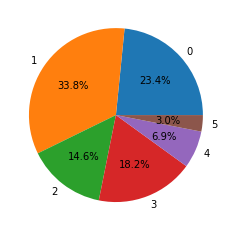

In [ ]:
k_=6
X = data.select_dtypes(np.number)
models=Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=k_, n_jobs=4))])
models.fit(X)
cluster=models['kmeans'].labels_
label=np.unique(cluster)
X=[data.iloc[cluster==i,:] for i in label]
pie=[i.shape[0] for i in X]
plt.pie(pie,labels=label, autopct='%1.1f%%')
plt.savefig(str(k_)+"pieKMeans.png")

In [ ]:
X = data.select_dtypes(np.number)
label=X.columns
label.to_list()

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']